__Задача 1__

Дана матрица объект-признак и значения целевой переменной.
Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать максимальный R2. Например, берем признак х1 и х3 и строим модель y = b0 + b1 * x1 + b2 * x3, затем признаки x2 и x1 и тд
Является ли значимым получившееся уравнение регрессии?


In [91]:
x = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

In [92]:
y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

In [93]:
from scipy import stats
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

Возьмём признаки 1 и 2 из массива х:

In [94]:
x_12 = (x[:, :2])
x_12

array([[ 1.22401313,  2.30868478],
       [-0.18757272,  1.30337355],
       [-0.81094525,  1.82463398],
       [ 0.75129018,  2.67392052],
       [ 0.00972362,  1.97367255],
       [-0.62972637,  0.77750764],
       [ 2.29536229,  1.81206697],
       [ 0.0920418 ,  2.26971361],
       [ 2.39252799,  3.17563985],
       [ 0.54983815,  2.87988651]])

К матрице Х (массив х_12) нужно также добавить столбец из  1 , соответствующий фиктивному фактору:

In [95]:
ones = np.ones((x_12.shape[0], 1))
x_12 = np.hstack((ones, x_12))
x_12

array([[ 1.        ,  1.22401313,  2.30868478],
       [ 1.        , -0.18757272,  1.30337355],
       [ 1.        , -0.81094525,  1.82463398],
       [ 1.        ,  0.75129018,  2.67392052],
       [ 1.        ,  0.00972362,  1.97367255],
       [ 1.        , -0.62972637,  0.77750764],
       [ 1.        ,  2.29536229,  1.81206697],
       [ 1.        ,  0.0920418 ,  2.26971361],
       [ 1.        ,  2.39252799,  3.17563985],
       [ 1.        ,  0.54983815,  2.87988651]])

Запишем матрицу  𝑋⊤𝑋  и посчитаем её определитель.

In [96]:
XTX = x_12.T.dot(x_12)

np.linalg.det(XTX)

349.7782033818847

Так как определитель равен 0, выбираем другую пару признаков из массива х:

Выберем пару признаков х1 и х3:

In [97]:
x_13 = (x[:, :3:2])
x_13

array([[ 1.22401313,  3.03636353],
       [-0.18757272,  5.12093014],
       [-0.81094525,  5.79686488],
       [ 0.75129018,  3.65529809],
       [ 0.00972362,  2.50594319],
       [-0.62972637,  2.84124027],
       [ 2.29536229,  1.95026215],
       [ 0.0920418 ,  7.47708735],
       [ 2.39252799,  3.61420599],
       [ 0.54983815,  1.65752765]])

In [98]:
ones = np.ones((x_13.shape[0], 1))
x_13 = np.hstack((ones, x_13))
x_13

array([[ 1.        ,  1.22401313,  3.03636353],
       [ 1.        , -0.18757272,  5.12093014],
       [ 1.        , -0.81094525,  5.79686488],
       [ 1.        ,  0.75129018,  3.65529809],
       [ 1.        ,  0.00972362,  2.50594319],
       [ 1.        , -0.62972637,  2.84124027],
       [ 1.        ,  2.29536229,  1.95026215],
       [ 1.        ,  0.0920418 ,  7.47708735],
       [ 1.        ,  2.39252799,  3.61420599],
       [ 1.        ,  0.54983815,  1.65752765]])

In [99]:
XTX = x_13.T.dot(x_13)

np.linalg.det(XTX)

2835.3600226240965

Так как определитель не близок к нулю, поэтому проблем с методом нет. Коэффициенты модели:

In [100]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_13.T).dot(y)

print(b)

[3.62455695 1.62531203 1.21134979]


Модель регрессии имеет вид:
$$y = 3.624 - 1.625 \cdot x_1 + 1.211 \cdot x_2,$$

Посчитаем коэффициент детерминации для оценки качества модели:

In [101]:
z_13 = x_13.dot(b)
z_13

array([ 9.29205855,  9.52293042,  9.32854895,  9.2734825 ,  6.67593463,
        6.04279092,  9.71768655, 12.83152181, 11.89122916,  6.52606129])

In [102]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [103]:
R2 = 1 - ((y - z_13)**2).sum() / sum_of_squares(y)
R2

0.7634246238793151

Коэффициент детерминации для модели х_13 = 0.763.

Выберем пару признаков х1 и х4:

In [104]:
x_14 = (x[:, :4:3])
x_14

array([[ 1.22401313,  2.69287214],
       [-0.18757272,  3.46363202],
       [-0.81094525,  1.86159445],
       [ 0.75129018,  1.66746094],
       [ 0.00972362,  1.69755173],
       [-0.62972637,  4.54410559],
       [ 2.29536229,  1.51874636],
       [ 0.0920418 ,  2.61081203],
       [ 2.39252799,  5.10773362],
       [ 0.54983815,  1.59635987]])

In [105]:
ones = np.ones((x_14.shape[0], 1))
x_14 = np.hstack((ones, x_14))
x_14

array([[ 1.        ,  1.22401313,  2.69287214],
       [ 1.        , -0.18757272,  3.46363202],
       [ 1.        , -0.81094525,  1.86159445],
       [ 1.        ,  0.75129018,  1.66746094],
       [ 1.        ,  0.00972362,  1.69755173],
       [ 1.        , -0.62972637,  4.54410559],
       [ 1.        ,  2.29536229,  1.51874636],
       [ 1.        ,  0.0920418 ,  2.61081203],
       [ 1.        ,  2.39252799,  5.10773362],
       [ 1.        ,  0.54983815,  1.59635987]])

In [106]:
XTX = x_14.T.dot(x_14)

np.linalg.det(XTX)

1689.2124743606082

Так как определитель не близок к нулю, поэтому проблем с методом нет. Коэффициенты модели:

In [107]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_14.T).dot(y)

print(b)

[5.70686123 0.68359949 1.12650707]


Модель регрессии имеет вид:
$$y = 5.707 - 0.684 \cdot x_1 + 1.127 \cdot x_2,$$

In [108]:
z_14 = x_14.dot(b)
z_14

array([ 9.57713548,  9.48044258,  7.24959879,  8.09884935,  7.62581232,
       10.39534769,  8.98684823,  8.71087917, 13.09629017,  7.88104099])

In [109]:
R2 = 1 - ((y - z_14)**2).sum() / sum_of_squares(y)
R2

0.4532966783144079

Коэффициент детерминации для модели х_14 = 0.453, что достаточно мало, так как около 55% дисперсии переменной у не объясняются в рамках данной модели

Выберем пару признаков х2 и х3:

In [110]:
x_23 = (x[:, 1:3])
x_23

array([[2.30868478, 3.03636353],
       [1.30337355, 5.12093014],
       [1.82463398, 5.79686488],
       [2.67392052, 3.65529809],
       [1.97367255, 2.50594319],
       [0.77750764, 2.84124027],
       [1.81206697, 1.95026215],
       [2.26971361, 7.47708735],
       [3.17563985, 3.61420599],
       [2.87988651, 1.65752765]])

In [111]:
ones = np.ones((x_23.shape[0], 1))
x_23 = np.hstack((ones, x_23))
x_23

array([[1.        , 2.30868478, 3.03636353],
       [1.        , 1.30337355, 5.12093014],
       [1.        , 1.82463398, 5.79686488],
       [1.        , 2.67392052, 3.65529809],
       [1.        , 1.97367255, 2.50594319],
       [1.        , 0.77750764, 2.84124027],
       [1.        , 1.81206697, 1.95026215],
       [1.        , 2.26971361, 7.47708735],
       [1.        , 3.17563985, 3.61420599],
       [1.        , 2.87988651, 1.65752765]])

In [112]:
XTX = x_23.T.dot(x_23)

np.linalg.det(XTX)

1427.8125776081495

Так как определитель не близок к нулю, поэтому проблем с методом нет. Коэффициенты модели:

In [113]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_23.T).dot(y)

print(b)

[2.48896193 1.60611956 0.86269915]


In [114]:
z_23 = x_23.dot(b)
R2 = 1 - ((y - z_23)**2).sum() / sum_of_squares(y)
R2

0.547948273403901

Коэффициент детерминации для модели х_23 = 0.578

Выберем пару признаков х2 и х4:

In [115]:
x_24 = (x[:, 1:4:2])
x_24

array([[2.30868478, 2.69287214],
       [1.30337355, 3.46363202],
       [1.82463398, 1.86159445],
       [2.67392052, 1.66746094],
       [1.97367255, 1.69755173],
       [0.77750764, 4.54410559],
       [1.81206697, 1.51874636],
       [2.26971361, 2.61081203],
       [3.17563985, 5.10773362],
       [2.87988651, 1.59635987]])

In [116]:
ones = np.ones((x_24.shape[0], 1))
x_24 = np.hstack((ones, x_24))
x_24

array([[1.        , 2.30868478, 2.69287214],
       [1.        , 1.30337355, 3.46363202],
       [1.        , 1.82463398, 1.86159445],
       [1.        , 2.67392052, 1.66746094],
       [1.        , 1.97367255, 1.69755173],
       [1.        , 0.77750764, 4.54410559],
       [1.        , 1.81206697, 1.51874636],
       [1.        , 2.26971361, 2.61081203],
       [1.        , 3.17563985, 5.10773362],
       [1.        , 2.87988651, 1.59635987]])

In [117]:
XTX = x_24.T.dot(x_24)

np.linalg.det(XTX)

701.732736445317

Так как определитель не близок к нулю, проблем с методом нет. Находим коэффициенты модели:

In [118]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_24.T).dot(y)

print(b)

[1.91685221 1.74373667 1.31971882]


In [119]:
z_24 = x_24.dot(b)
R2 = 1 - ((y - z_24)**2).sum() / sum_of_squares(y)
R2

0.6062055761129932

Коэффициент детерминации для модели х_24 = 0.606

Выберем пару признаков х3 и х4:

In [120]:
x_34 = (x[:, 2:4])
x_34

array([[3.03636353, 2.69287214],
       [5.12093014, 3.46363202],
       [5.79686488, 1.86159445],
       [3.65529809, 1.66746094],
       [2.50594319, 1.69755173],
       [2.84124027, 4.54410559],
       [1.95026215, 1.51874636],
       [7.47708735, 2.61081203],
       [3.61420599, 5.10773362],
       [1.65752765, 1.59635987]])

In [121]:
ones = np.ones((x_34.shape[0], 1))
x_34 = np.hstack((ones, x_34))
x_34

array([[1.        , 3.03636353, 2.69287214],
       [1.        , 5.12093014, 3.46363202],
       [1.        , 5.79686488, 1.86159445],
       [1.        , 3.65529809, 1.66746094],
       [1.        , 2.50594319, 1.69755173],
       [1.        , 2.84124027, 4.54410559],
       [1.        , 1.95026215, 1.51874636],
       [1.        , 7.47708735, 2.61081203],
       [1.        , 3.61420599, 5.10773362],
       [1.        , 1.65752765, 1.59635987]])

In [122]:
XTX = x_34.T.dot(x_34)

np.linalg.det(XTX)

4547.328074863321

Так как определитель не близок к нулю, проблем с методом нет. Находим коэффициенты модели:

In [123]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_34.T).dot(y)

print(b)

[3.64001086 0.70753914 1.04851745]


Модель регрессии имеет вид:
$$y = 3.640 - 0.708 \cdot x_1 + 1.049 \cdot x_2,$$

In [124]:
z_34 = x_34.dot(b)
R2 = 1 - ((y - z_34)**2).sum() / sum_of_squares(y)
R2

0.6224419876505324

Коэффициент детерминации для модели х_34 = 0.622

Уровень линейной зависимости целевой переменной от значений  признаков 1 и 3 наиболее высокий. Коэффициент детерминации для модели х_13 = 0.763.

Проверим значимость уравнения регрессии:

In [125]:
n = x_13.shape[0]
m = x_13.shape[1] - 1  # поскольку добавляли фиктивный столбец

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

Находим критическую область:

In [126]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Находим статистику:

In [127]:
F = (R2 / k1) / ((1 - R2) / k2)
F

5.770098595498487

Статистика попала в критическую область, поэтому уравнение регрессии признаётся значимым.

__Задача 2__

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
(доп) Посчитать среднюю ошибку аппроксимации

In [128]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Найдём коэффициенты линейной регрессии с помощью формул для парной регрессии:

In [129]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)

b0, b1

(444.1773573243596, 2.620538882402765)

Найдите коэффициенты линейной регрессии с помощью метода наименьших квадратов:

In [142]:
sal = salary.reshape(-1, 1)
sc = scoring.reshape(-1, 1)
sal, sc

(array([[ 35],
        [ 45],
        [190],
        [200],
        [ 40],
        [ 70],
        [ 54],
        [150],
        [120],
        [110]]),
 array([[401],
        [574],
        [874],
        [919],
        [459],
        [739],
        [653],
        [902],
        [746],
        [832]]))

In [144]:
ones = np.ones((sal.shape[0], 1))
sal = np.hstack((ones, sal))
sal

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [145]:
XTX = sal.T.dot(sal)

np.linalg.det(XTX)

349464.00000000023

In [146]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(sal.T).dot(sc)

print(b)

[[444.17735732]
 [  2.62053888]]


Коэффициенты, посчитанные при помощи метода наименьших квадратов и формулы для парной регресии совпадают.

In [131]:
plt.style.use('seaborn-whitegrid')

Text(0, 0.5, 'скоринг')

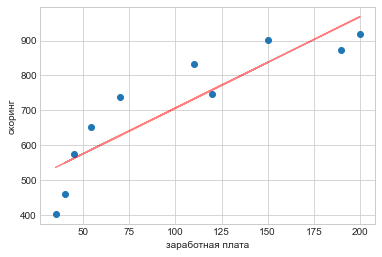

In [132]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('заработная плата')
plt.ylabel('скоринг')

Расчитаем коэффициент детерминаци:

In [133]:
z = b0 + b1 * salary
z

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [134]:
R = 1 - ((scoring - z)**2).sum() / sum_of_squares(scoring)
R

0.7876386635293686

Оценим построенное уравнение регрессии с помощью F-критерия Фишера:

In [135]:
n = salary.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [136]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

Критическая область:
$$\Omega_\alpha = \left( 5.32, \infty \right)$$

Посчитаем значение F-статистики:

In [137]:
F = (R / k1) / ((1 - R) / k2)
F

29.67164085966451

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

Посчитаем среднюю ошибку аппроксимации:

In [138]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [139]:
mean_approximation_error(scoring, z)

0.11469251843561709